# Connecting to Data Base

In [5]:
import pandas as pd
import pymysql
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

with open('./../../../password_for_travelmassive_database.p', 'rb') as file:
    password = pickle.load(file)

In [7]:
conn = pymysql.connect("localhost","root",password,"travelmassive" )

In [8]:
tables = ['flagging']

In [18]:
def load_table(table, connection = conn):
    query = 'SELECT * FROM ' + table
    table = pd.read_sql(sql=query, con=connection)
    return table

def ram_rambo(tables, connection):
    "loads all the tables from the list 'tables' into a dictionary"
    database_as_dict = {}
    for table in tables:
        database_as_dict[table] = load_table(table, connection = connection)
    return database_as_dict

In [10]:
df = pd.read_sql('SELECT * FROM flagging', con=conn)

In [11]:
df.head()

,flagging_id,fid,entity_type,entity_id,uid,sid,timestamp
0,13422,1,user,10439,10438,0,1419956180
1,13423,1,user,10437,10438,0,1419956184
2,13425,3,node,12881,10438,0,1419956778
3,13426,1,user,10440,10438,0,1419957896
4,13429,3,node,12875,10440,0,1419960732


In [12]:
df.shape

(254261, 7)

To start with, we care about the connections between users. So, consider only the rows with
        
    fid == 1

In [13]:
df_users = df[df['fid'] == 1]
df_users.shape # the 74238 rows are more managable than 250k+

(74238, 7)

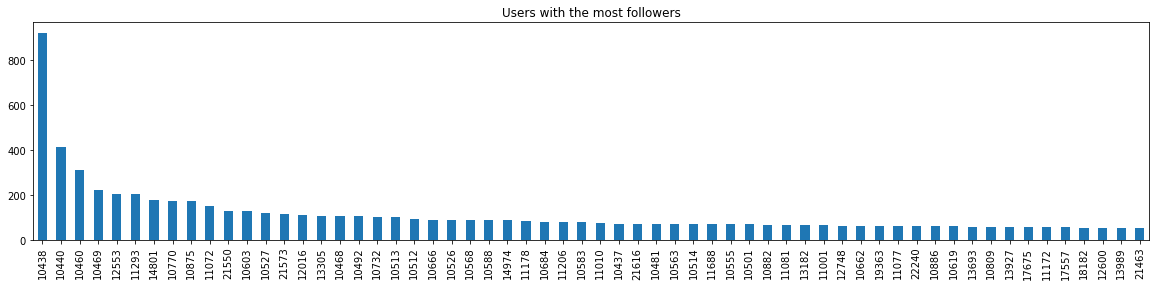

In [14]:
df_users['entity_id'].value_counts().head(60).plot(kind = 'bar', figsize = (20,4), 
                                                   title='Users with the most followers')
plt.show()

In [15]:
df_users.head()

,flagging_id,fid,entity_type,entity_id,uid,sid,timestamp
0,13422,1,user,10439,10438,0,1419956180
1,13423,1,user,10437,10438,0,1419956184
3,13426,1,user,10440,10438,0,1419957896
6,13431,1,user,10438,10442,0,1419962339
7,13432,1,user,10442,10438,0,1419962382


In [16]:
(df_users['timestamp'] - df_users['timestamp'].sort_values()).sum()

0

In [17]:
def show_first_n_connections(n = 50, show = False, axis = None, labels = False):
    np.random.seed = 42
    if show: fig = plt.figure(figsize = (20,10))
    conns = nx.DiGraph(data = list((df_users[['entity_id','uid']].head(n).values)))
    nx.draw(conns, pos=nx.spring_layout(conns), ax=axis, with_labels=labels)
    if show: fig.title = 'First {} connections'.format(n)
    if show: plt.show()

The thick section starts from the uid in the connection and points to the entity_id


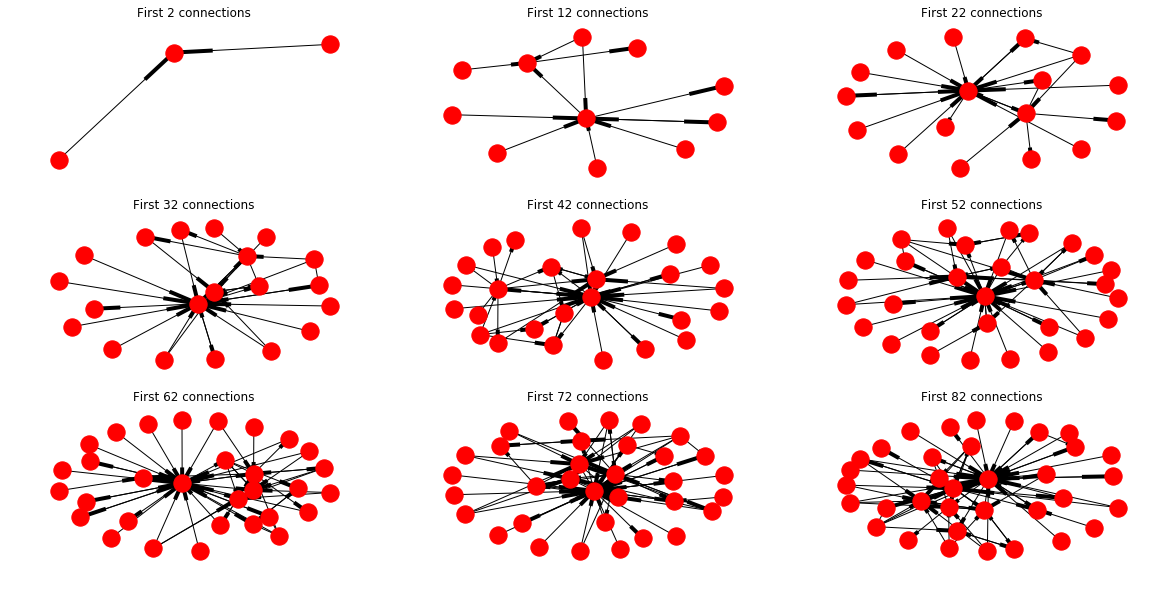

In [126]:
a, b  = 3,3
fig, axes = plt.subplots(ncols= a,nrows= b)
fig.set_size_inches(20,10)
print('The thick section starts from the uid in the connection and points to the entity_id')
for i, size in enumerate(range(2,91,10)):
    show_first_n_connections(n=size, axis=axes[i//b,i%b], labels = False)
    axes[i//b,i%b].set_title('First {} connections'.format(size))
plt.show()


# Looking at Tables of Interest

In [25]:
load_table('field_revision_field_user_first_name').head()

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_user_first_name_value,field_user_first_name_format
0,user,user,0,1,1,und,0,Travel,None
1,user,user,0,10437,10437,und,0,Katy,None
2,user,user,0,10438,10438,und,0,Ian,None
3,user,user,0,10439,10439,und,0,Mo,None
4,user,user,0,10440,10440,und,0,Erika,None


In [21]:
load_table('field_data_field_country').head()

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_country_iso2
0,node,chapter,0,12832,12832,und,0,GR
1,node,chapter,0,12833,12833,und,0,US
2,node,chapter,0,12834,12834,und,0,US
3,node,chapter,0,12835,12835,und,0,TH
4,node,chapter,0,12836,12836,und,0,DE


In [22]:
load_table('field_data_field_geomaplocation').head()

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_geomaplocation_geom,field_geomaplocation_geo_type,field_geomaplocation_lat,field_geomaplocation_lon,field_geomaplocation_left,field_geomaplocation_top,field_geomaplocation_right,field_geomaplocation_bottom,field_geomaplocation_geohash
0,node,chapter,0,12832,12832,und,0,b'\x01\x01\x00\x00\x00\x0f\x0b\xb5\xa6y\xb77@\...,point,37.9667,23.7167,23.7167,37.9667,23.7167,37.9667,sw8zgxtup
1,node,chapter,0,12833,12833,und,0,b'\x01\x01\x00\x00\x00)\\\x8f\xc2\xf5\x18U\xc0...,point,33.7550,-84.3900,-84.3900,33.7550,-84.3900,33.7550,dn5bp8vj
2,node,chapter,0,12834,12834,und,0,b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00pX\x...,point,30.2500,-97.7500,-97.7500,30.2500,-97.7500,30.2500,9v6kpd
3,node,chapter,0,12835,12835,und,0,b'\x01\x01\x00\x00\x00\xc4B\xadi\xde\x1dY@\x00...,point,13.7500,100.4667,100.4667,13.7500,100.4667,13.7500,w4rqnpjee
4,node,chapter,0,12836,12836,und,0,b'\x01\x01\x00\x00\x00\x15\x1d\xc9\xe5?\xc4*@\...,point,52.5167,13.3833,13.3833,52.5167,13.3833,52.5167,u33db837v


In [23]:
load_table('field_data_field_home_chapter').head()

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_home_chapter_target_id
0,user,user,0,10437,10437,und,0,13949
1,user,user,0,10438,10438,und,0,12881
2,user,user,0,10440,10440,und,0,12875
3,user,user,0,10441,10441,und,0,12852
4,user,user,0,10442,10442,und,0,12853


In [26]:
load_table('field_data_field_location').head() # Not interesting at the moment

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_location_value,field_location_format
0,node,event,0,10415,10415,und,0,"The Spence, 75 5th St NW , Atlanta, Georgia 30308",plain_text
1,node,event,0,13566,13569,und,0,,None
2,node,event,0,13567,13570,und,0,,None
3,node,event,0,13568,13571,und,0,,None
4,node,event,0,13569,13572,und,0,"\t264 19th St NW, Atlanta, GA 30363",None


In [27]:
load_table('field_data_field_user_question_2').head()

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_user_question_2_value,field_user_question_2_format
0,user,user,0,10437,10437,und,0,Japan,None
1,user,user,0,10438,10438,und,0,Africa,None
2,user,user,0,10440,10440,und,0,Iceland and Patagonia,None
3,user,user,0,10441,10441,und,0,Asia,None
4,user,user,0,10442,10442,und,0,Back to Africa,None


In [30]:
load_table('field_revision_field_user_country').head()

,entity_type,bundle,deleted,entity_id,revision_id,language,delta,field_user_country_iso2
0,user,user,0,1,1,und,0,US
1,user,user,0,10437,10437,und,0,GB
2,user,user,0,10438,10438,und,0,AU
3,user,user,0,10439,10439,und,0,GB
4,user,user,0,10440,10440,und,0,US


# Looking into how connected countries are by their users.

In [31]:
df = load_table('field_revision_field_user_country')

In [32]:
df.field_user_country_iso2.nunique()

178

In [38]:
def get_users_in_counntries(df):
    ans = df.groupby('field_user_country_iso2').apply(lambda x: set(x['entity_id'].values))
    return ans

In [41]:
get_users_in_counntries(df).head()

field_user_country_iso2
AD                                {36585, 12341, 12342}
AE    {13568, 43011, 25348, 23431, 13576, 37006, 370...
AF                                              {25914}
AI                                              {33979}
AL    {26636, 38924, 38927, 26645, 38935, 38944, 266...
dtype: object

In [45]:
countries = get_users_in_counntries(df)

In [43]:
flagging_table = load_table('flagging')
user_flags = flagging_table[flagging_table['fid'] == 1]

In [44]:
user_flags.head()

,flagging_id,fid,entity_type,entity_id,uid,sid,timestamp
0,13422,1,user,10439,10438,0,1419956180
1,13423,1,user,10437,10438,0,1419956184
3,13426,1,user,10440,10438,0,1419957896
6,13431,1,user,10438,10442,0,1419962339
7,13432,1,user,10442,10438,0,1419962382


In [68]:
eflagging = flagging_table.copy()

In [72]:
for country in countries.keys():
    eflagging[country + '_following'] = eflagging['uid'].apply(lambda x:x in countries[country])
    eflagging[country + '_beinng_followed'] = eflagging['entity_id'].apply(lambda x:x in countries[country])

In [83]:
countries_being_followed_and_following = eflagging.iloc[:,7:]

In [86]:
temp = countries_being_followed_and_following.sum()

In [99]:
agregate_table = pd.DataFrame({'following':temp.iloc[range(0,356,2)].values,'begin_followed':temp.iloc[range(1,356,2)].values}, 
             index=[x.split('_')[0] for x in temp.index[::2]])

In [101]:
agregate_table.corr()

,begin_followed,following
begin_followed,1.000000,0.997043
following,0.997043,1.000000


In [164]:
import numpy as np
agregate_table['ratio'] = agregate_table['begin_followed']/agregate_table['following']
agregate_table['nlog'] = (agregate_table['begin_followed'] + agregate_table['following']).apply(lambda x:-np.log(x))
agregate_table.head()

,begin_followed,following,ratio,nlog
AD,14,14,1.000000,-3.332205
AE,353,564,0.625887,-6.821107
AF,7,2,3.500000,-2.197225
AI,1,1,1.000000,-0.693147
AL,346,884,0.391403,-7.114769


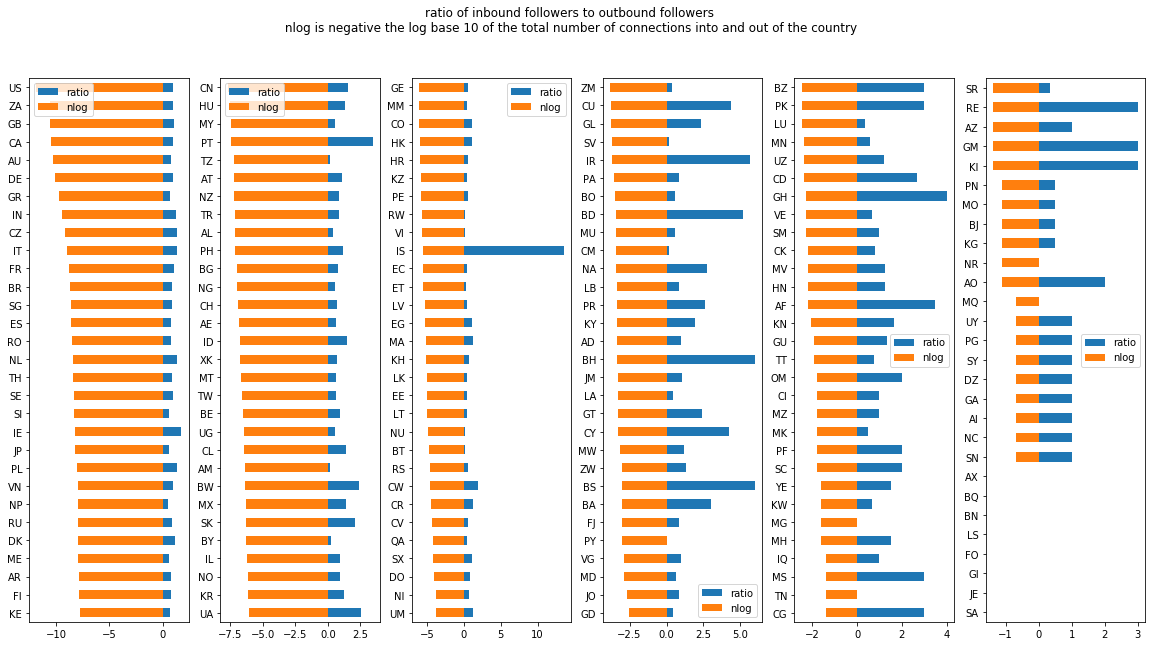

In [167]:
fig, axes = plt.subplots(ncols=6, nrows=1)
temp = agregate_table[['ratio','nlog']].sort_values(by = 'nlog')

for i in range(6):
    temp.iloc[i*30 :i*30 + 30,:].sort_values(by = 'nlog', ascending = False)\
    .plot(kind='barh', stacked = True, figsize = (20,10), ax = axes[i])
fig.suptitle('ratio of inbound followers to outbound followers\n nlog is negative the log base 10 of the total number of connections into and out of the country')
plt.show()